## Importing Libraries


In [7]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
from sklearn.preprocessing import LabelEncoder
import plotly.express as px

In [8]:
df_train = pd.read_csv('Dataset/train.csv')
df_train

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819,30,WALKING_UPSTAIRS
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053,30,WALKING_UPSTAIRS
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811,30,WALKING_UPSTAIRS
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,-0.344314,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339,30,WALKING_UPSTAIRS


In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB


In [11]:
df_train.isna().sum()

tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 563, dtype: int64

In [12]:
df = pd.concat([df_train, df_test], ignore_index=True)

## Visualizing target categories

<Axes: xlabel='Activity', ylabel='count'>

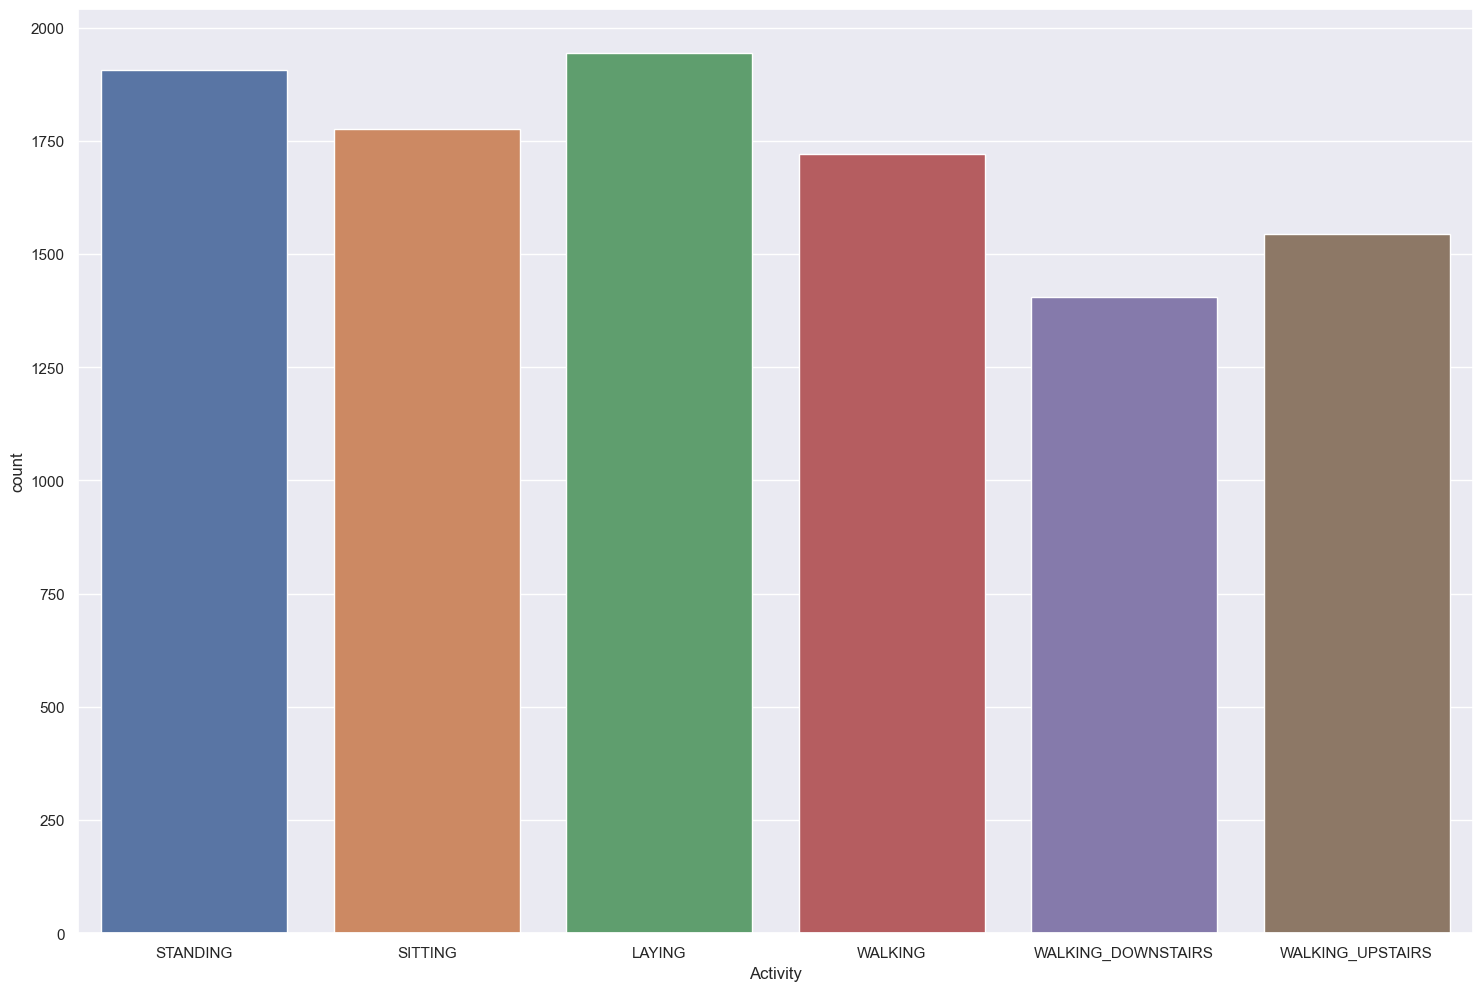

In [13]:
plt.figure(figsize =(18,12))
sns.set()
sns.countplot(data=df, x= "Activity")

## Encoding

In [14]:
LE = LabelEncoder()
df['Activity'] = LE.fit_transform(df['Activity'])

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=10)

## Scaling the features

In [18]:
sc = StandardScaler()

In [19]:
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

## Logistic Regression

In [20]:
l = LogisticRegression(C=0.01, solver='saga',max_iter=1000)

In [21]:
l.fit(x_train,y_train)

LogisticRegression(C=0.01, max_iter=1000, solver='saga')

In [22]:
l.score(x_train,y_train)

0.9796737441740031

In [23]:
l.score(x_test,y_test)

0.9716504854368933

In [24]:
l.get_params()

{'C': 0.01,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 1000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'saga',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [25]:
type(x_test)

numpy.ndarray

In [26]:
y_predlr = l.predict(x_test)
y_predlr

array([3, 1, 4, ..., 3, 0, 0])

## KNN Classifier

In [27]:
classifier1 = KNeighborsClassifier(n_neighbors=5 )

In [28]:
classifier1.fit(x_train,y_train)

KNeighborsClassifier()

In [29]:
classifier1.score(x_train,y_train)

0.9812273433454168

In [30]:
classifier1.score(x_test,y_test)

0.9603883495145631

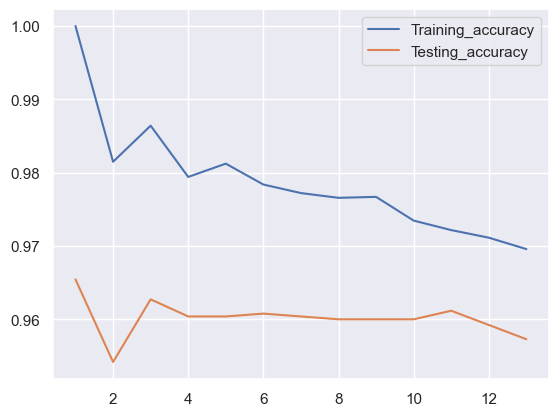

In [31]:
train_accuracy=[]
test_accuracy=[]
for i in range(1,14):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    train_accuracy.append(knn.score(x_train,y_train))
    test_accuracy.append(knn.score(x_test,y_test))

x=[i for i in range(1,14)]
plt.plot(x,train_accuracy,label='Training_accuracy')
plt.plot(x,test_accuracy,label='Testing_accuracy')
plt.legend()
plt.plot();

In [32]:
print( "train_accuracy : ",train_accuracy)
print ("test_accuracy : ",test_accuracy)


train_accuracy :  [1.0, 0.9814862765406525, 0.9864060072501295, 0.9794148109787675, 0.9812273433454168, 0.978379078197825, 0.9772138788192646, 0.9765665458311755, 0.9766960124287933, 0.9734593474883481, 0.9721646815121698, 0.9711289487312273, 0.9695753495598136]
test_accuracy :  [0.9654368932038835, 0.9541747572815534, 0.9627184466019417, 0.9603883495145631, 0.9603883495145631, 0.9607766990291262, 0.9603883495145631, 0.96, 0.96, 0.96, 0.9611650485436893, 0.9592233009708738, 0.9572815533980582]


In [33]:
classifier1.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [34]:
y_predc = l.predict(x_test)
y_predc

array([3, 1, 4, ..., 3, 0, 0])